In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_75020364d38347bd8fbd087f41e51d98 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kZu8ytrOK6VySc53O9ewAe_Tit-uEjqFPm7PxupXXk_F',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_75020364d38347bd8fbd087f41e51d98.get_object(Bucket='medicalcharges-donotdelete-pr-xgcar5fv5dfhac',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])

In [8]:
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [9]:
df = pd.get_dummies(df, columns= ['region'], drop_first = True)

In [10]:
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
5,31,0,25.740,0,0,3756.62160,0,1,0
6,46,0,33.440,1,0,8240.58960,0,1,0
7,37,0,27.740,3,0,7281.50560,1,0,0
8,37,1,29.830,2,0,6406.41070,0,0,0
9,60,0,25.840,0,0,28923.13692,1,0,0


In [11]:
df.corr()
y=df[['charges']]

In [12]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [13]:
df.drop(['charges'],axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


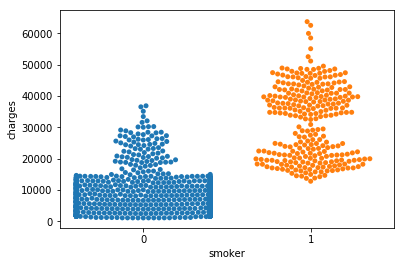

In [14]:
sns.swarmplot(x=df['smoker'],y=y['charges'])

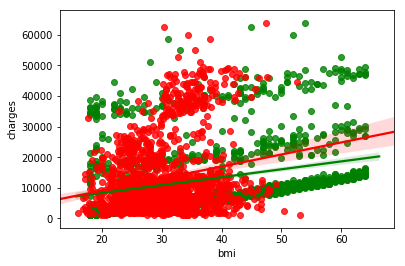

In [15]:
sns.regplot(x=df['age'],y=y['charges'],color='green')
sns.regplot(x=df['bmi'],y=y['charges'],color='red')